In [117]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")
plt.rc('legend',fontsize=15)

from spiketimes.plots import add_event_vlines

In [3]:
data_dir = Path(".").absolute().parent / "data"
fig_dir = Path(".").absolute().parent / "figs"
dfs = pd.read_csv(data_dir / "cross_corr_simp.csv")
dfcc = pd.read_csv(data_dir / "cross_corr.csv")

In [5]:
dfs.head()

,spiketrain_1,spiketrain_2,binsize,time_bin,lowest_p,spiketrain_1_cluster,spiketrain_2_cluster,has_sr,has_sir,has_ff,comb
0,1,4,0.001,-0.072,0.231090,slow_regular,slow_irregular,True,True,False,sr_sir
1,1,4,0.010,-0.200,0.207566,slow_regular,slow_irregular,True,True,False,sr_sir
2,1,5,0.001,0.057,0.231090,slow_regular,slow_regular,True,False,False,sr_sr
3,1,5,0.010,0.010,0.000246,slow_regular,slow_regular,True,False,False,sr_sr
4,4,5,0.001,-0.121,0.231090,slow_irregular,slow_regular,True,True,False,sr_sir


## Large Time Scale

In [187]:
(
    dfs
    .loc[lambda x: (x.lowest_p < 0.01) & (x.time_bin > 0.1)]
    .sample(5)
)

,spiketrain_1,spiketrain_2,binsize,time_bin,lowest_p,spiketrain_1_cluster,spiketrain_2_cluster,has_sr,has_sir,has_ff,comb
135,17,36,0.01,0.19,6.758127e-11,slow_regular,slow_irregular,True,True,False,sr_sir
15717,2619,2626,0.01,0.58,5.461342e-03,slow_regular,slow_regular,True,False,False,sr_sr
6235,1690,1691,0.01,0.18,1.640859e-04,fast_firing,slow_regular,True,False,True,sr_ff
15343,2594,2619,0.01,1.07,9.273450e-04,slow_regular,slow_regular,True,False,False,sr_sr
14865,2533,2590,0.01,0.21,1.248269e-05,slow_regular,slow_regular,True,False,False,sr_sr


In [188]:
binsize = 0.01
c1 = 2620
c2 = 2629

In [189]:
dfp = (
    dfcc
    .loc[lambda x: 
         (x.spiketrain_1 == c1) & 
         (x.spiketrain_2 == c2) &
         (x.binsize == binsize)]
)
x = dfp.time_bin.values
y = dfp.crosscorrelation.values

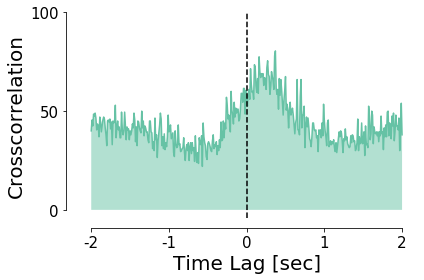

In [190]:

_, ax = plt.subplots()

sns.lineplot(data=dfp, x="time_bin", y="crosscorrelation", ax=ax)
ax.fill_between(x, y, alpha=0.5)

add_event_vlines(ax=ax, events=[0])

ax.set_ylabel("Crosscorrelation", fontsize=20)
ax.set_yticks([0, 100, 200])


ax.set_xlabel("Time Lag [sec]", fontsize=20)
ax.set_xticks([-2, -1, 0, 1, 2])

sns.despine(offset=10, trim=True)
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticklabels([0, 50, 100, 150, 200], fontsize=15)

sns.despine()

plt.tight_layout()
plt.savefig(str(fig_dir / "cc_big_example.png"), dpi=300, transparent=True)

## Small Time Scale

In [191]:
binsize = 0.001

In [192]:
(
    dfs
    .loc[lambda x: (x.lowest_p < 0.01) & (x.binsize == 0.001)]
    .sample(5)
)

,spiketrain_1,spiketrain_2,binsize,time_bin,lowest_p,spiketrain_1_cluster,spiketrain_2_cluster,has_sr,has_sir,has_ff,comb
6408,1713,1726,0.001,-0.030,5.809714e-07,slow_irregular,slow_irregular,False,True,False,sir_sir
1872,124,126,0.001,0.002,2.912922e-09,slow_irregular,slow_irregular,False,True,False,sir_sir
14112,2542,2568,0.001,0.176,6.730256e-03,slow_regular,slow_irregular,True,True,False,sr_sir
2924,132,178,0.001,-0.002,2.427705e-08,slow_regular,slow_irregular,True,True,False,sr_sir
1358,111,113,0.001,0.001,6.898813e-03,fast_firing,fast_firing,False,False,True,ff_ff


In [193]:
binsize = 0.001
c1 = 1720
c2 = 1733

dfp = (
    dfcc
    .loc[lambda x: 
         (x.spiketrain_1 == c1) & 
         (x.spiketrain_2 == c2) &
         (x.binsize == binsize)]
)
x = dfp.time_bin.values
y = dfp.crosscorrelation.values

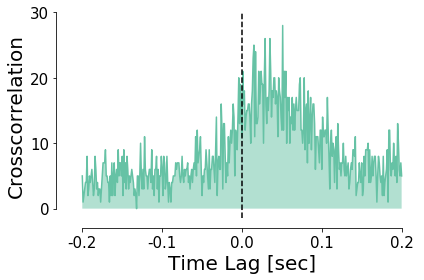

In [194]:
_, ax = plt.subplots()

sns.lineplot(data=dfp, x="time_bin", y="crosscorrelation", ax=ax)
ax.fill_between(x, y, alpha=0.5)

add_event_vlines(ax=ax, events=[0])

ax.set_ylabel("Crosscorrelation", fontsize=20)
ax.set_yticks([0, 10, 20, 30])


ax.set_xlabel("Time Lag [sec]", fontsize=20)
ax.set_xticks([-0.2, -0.1, 0, 0.1, 0.2])

sns.despine(offset=10, trim=True)
ax.set_xticklabels(np.round(ax.get_xticks(), 2), fontsize=15)
ax.set_yticklabels(np.round(ax.get_yticks(), 1), fontsize=15)
sns.despine()
plt.tight_layout()
plt.savefig(str(fig_dir / "cc_small_example.png"), dpi=300, transparent=True)

In [135]:
c1 = 1720
c2 = 1733